In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

HOME = Path(os.getcwd()).parents[0]

sys.path.insert(1, str(HOME))
log_folder = '/user/home/uz22147/logs/cgan/38fba564f1c9852b/1000'

from dsrnngan.plots import plot_precip


In [3]:
eval_df = pd.read_csv(os.path.join(log_folder, 'eval_validation_201806-201905.csv'))
eval_df.head()

,N,op,CRPS_no_pooling,CRPS_max_4,CRPS_max_16,CRPS_avg_4,CRPS_avg_16,mae,rmse,emmse,emmse_fcst,ralsd,corr,corr_ensemble,corr_fcst
0,160000,0.221776,0.13481,0.13481,0.13481,0.13481,0.13481,0.250113,1.28052,0.866515,0.821147,3.165508,0.03409,0.070937,0.102624


In [4]:
with np.load(os.path.join(log_folder, 'ranksnew-201806-201905_160000.npz')) as ranks_data:
    ranks_dict = dict(ranks_data.items())

with open(os.path.join(log_folder, 'rapsd-201806-201905_160000.pkl'), 'rb') as ifh:
    rapsd = pickle.load(ifh)

with open(os.path.join(log_folder, 'grid_metrics-201806-201905_160000.pkl'), 'rb') as ifh:
    grid_metrics = pickle.load(ifh)

with open(os.path.join(log_folder, 'quantiles-201806-201905_160000.pkl'), 'rb') as ifh:
    quantiles = pickle.load(ifh)

with open(os.path.join(log_folder, 'arrays_201806-201905.pkl'), 'rb') as ifh:
    arrays = pickle.load(ifh)

## Rank histogram

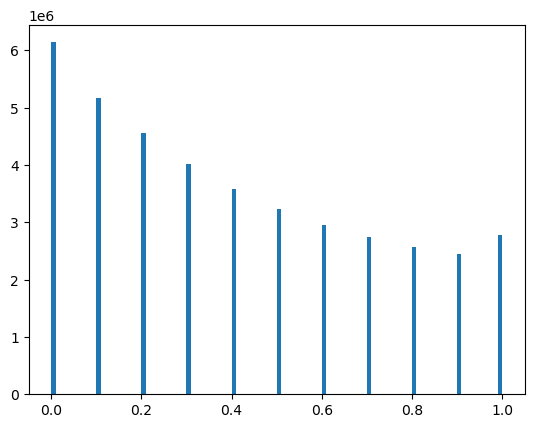

In [109]:
plt.hist(ranks_dict['ranks'], bins=100)
plt.show()

# RAPSD

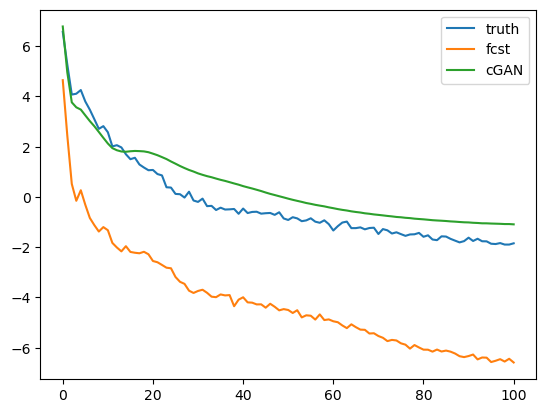

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(np.log(rapsd['rapsd_truth']), label='truth')
ax.plot(np.log(rapsd['rapsd_fcst']), label='fcst')
ax.plot(np.log(rapsd['rapsd_pred']), label='cGAN') # Single member of ensemble
ax.legend()

## Quantiles

Text(0.5, 0, 'cGAN sample')

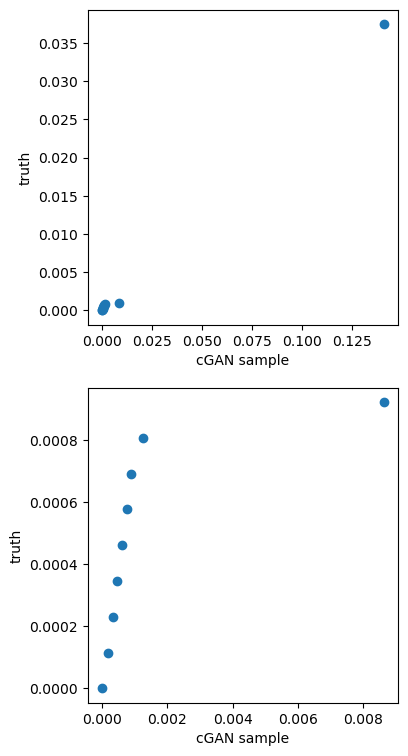

In [106]:
fig, ax = plt.subplots(2,1, figsize=(4, 9))

ax[0].scatter(quantiles['sample'], quantiles['truth'])
ax[0].set_ylabel('truth')
ax[0].set_xlabel('cGAN sample')

ax[1].scatter(quantiles['sample'][:-1], quantiles['truth'][:-1])
ax[1].set_ylabel('truth')
ax[1].set_xlabel('cGAN sample')

## Grid metrics

In [82]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colorbar, colors, gridspec
from dsrnngan.plots import default_latitude_range, default_longitude_range

print(grid_metrics.keys())
bias_dict = {k: v for k, v in grid_metrics.items() if k.startswith('bias')}
crps_dict = {k: v for k, v in grid_metrics.items() if k.startswith('CRPS')}

dict_keys(['rmse', 'bias', 'bias_fcst', 'bias_std', 'bias_median', 'CRPS_no_pooling', 'CRPS_max_4', 'CRPS_max_16', 'CRPS_avg_4', 'CRPS_avg_16'])


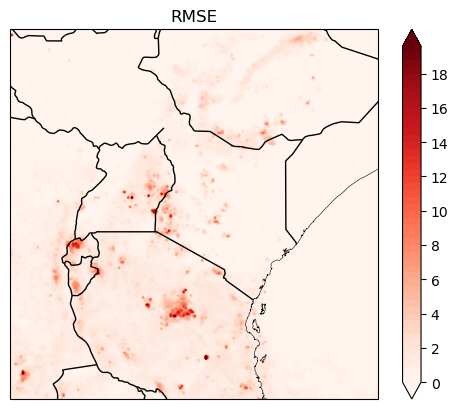

In [85]:
# RMSE
fig, ax = plt.subplots(1, 1, 
                       subplot_kw={'projection' : ccrs.PlateCarree()})

max_level = 20
value_range = list(np.arange(0, max_level, max_level / 50))

im = ax.contourf(default_longitude_range, default_latitude_range, grid_metrics['rmse'], transform=ccrs.PlateCarree(),
                    cmap='Reds', 
                    levels=value_range, norm=colors.Normalize(min(value_range), max(value_range)),
                    extend='both')

ax.coastlines(resolution='10m', color='black', linewidth=0.4)
ax.add_feature(cfeature.BORDERS)
ax.set_title('RMSE')
plt.colorbar(im, ax=ax)

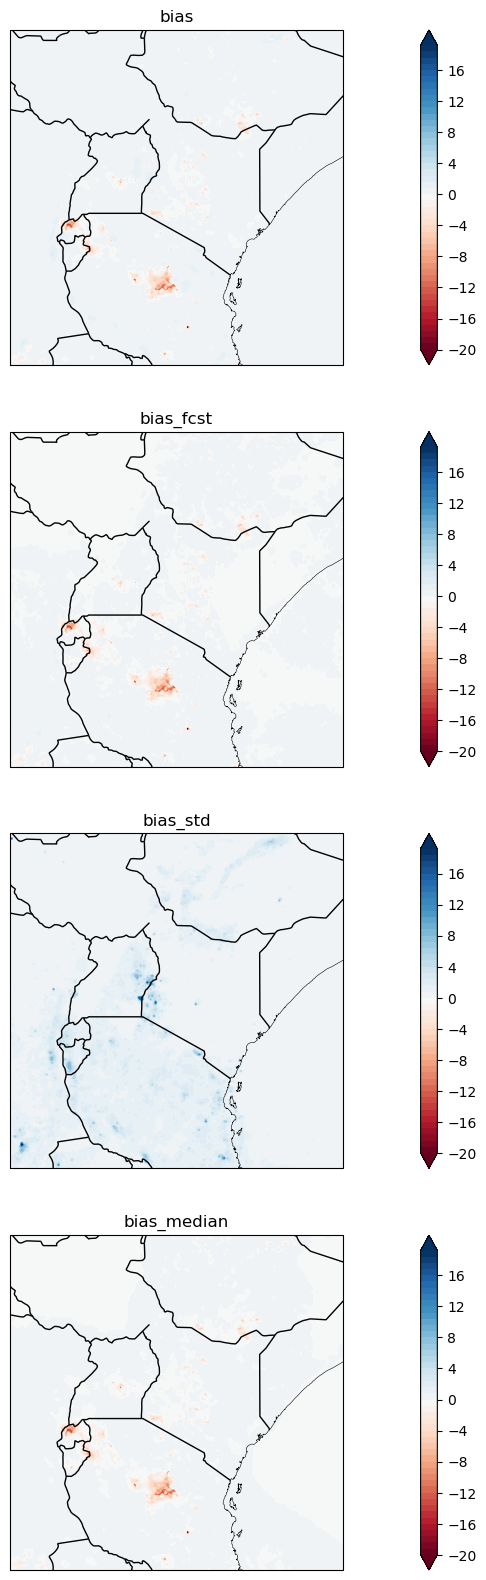

In [75]:


fig, ax = plt.subplots(len(bias_dict.keys()), 1, 
                       subplot_kw={'projection' : ccrs.PlateCarree()}, figsize=(20, 20))

for n, k in enumerate(bias_dict.keys()):

    if k != 'bias_std':
        max_level = 20
        value_range = list(np.arange(-max_level, max_level, 2*max_level / 50))
    else:
        max_level = 20
        value_range = list(np.arange(-max_level, max_level, 2*max_level / 50))

    im = ax[n].contourf(default_longitude_range, default_latitude_range, bias_dict[k], transform=ccrs.PlateCarree(),
                        cmap='RdBu', 
                        levels=value_range, norm=colors.Normalize(min(value_range), max(value_range)),
                        extend='both')

    ax[n].coastlines(resolution='10m', color='black', linewidth=0.4)
    ax[n].add_feature(cfeature.BORDERS)
    ax[n].set_title(k)
    plt.colorbar(im, ax=ax[n])

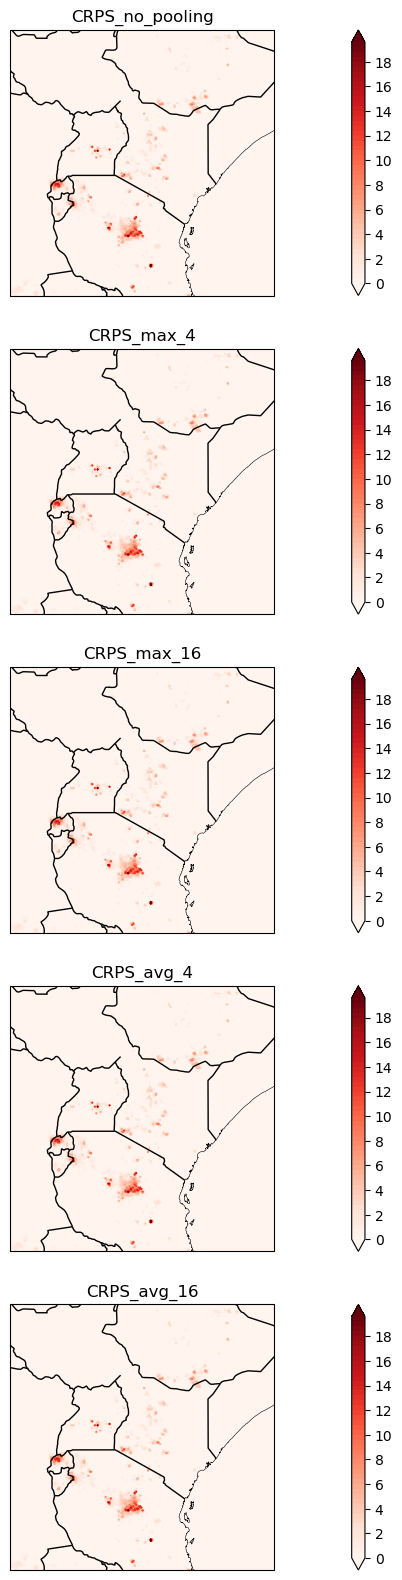

In [81]:
fig, ax = plt.subplots(len(crps_dict.keys()), 1, 
                       subplot_kw={'projection' : ccrs.PlateCarree()}, figsize=(20, 20))

for n, k in enumerate(crps_dict.keys()):

    max_level = 20
    value_range = list(np.arange(0, max_level, max_level / 50))

    im = ax[n].contourf(default_longitude_range, default_latitude_range, crps_dict[k], transform=ccrs.PlateCarree(),
                        cmap='Reds', 
                        levels=value_range, norm=colors.Normalize(min(value_range), max(value_range)),
                        extend='both')

    ax[n].coastlines(resolution='10m', color='black', linewidth=0.4)
    ax[n].add_feature(cfeature.BORDERS)
    ax[n].set_title(k)
    plt.colorbar(im, ax=ax[n])

## Scatter plots

In [19]:
import random

truth = arrays[0]
samples_gen = arrays[1]

(num_images, height, width, ensemble_size) = samples_gen.shape

stacked_truth = np.repeat(truth[:, :, :, np.newaxis], ensemble_size, axis=3)

In [8]:
indexes = random.sample(range(len(samples_gen.flatten())), 10000)

(402000,)

In [17]:
samples_gen.flatten()[indexes]

array([0.00022189, 0.00046843], dtype=float32)

In [18]:
samples_gen.flatten()[indexes]

array([0.00022189, 0.00046843], dtype=float32)

In [13]:
random.choices(samples_gen.flatten(), k=2)

[0.0006300058, 0.020301158]

In [9]:
import random

random.choices(samples_gen, k=10)

[array([[[9.1811671e-04, 4.5332108e-02, 1.5575157e+00, ...,
          2.0832303e+00, 4.0749423e-03, 4.0030179e+00],
         [6.9355645e-04, 1.3376431e-01, 2.8622649e+00, ...,
          2.1750567e+00, 1.9929146e-03, 5.6400509e+00],
         [5.0377887e-04, 7.2801379e-03, 2.6103849e+00, ...,
          1.9743633e+00, 9.2322408e-04, 3.0589232e+00],
         ...,
         [6.6516829e-01, 8.4596575e-04, 3.6920792e-01, ...,
          1.5744309e-01, 1.4785316e-03, 1.3233782e-05],
         [1.4909627e-01, 1.1295327e-03, 5.3043407e-01, ...,
          2.4110231e-01, 2.4225719e-03, 9.5551152e-04],
         [6.8404429e-02, 4.4732931e-04, 3.6524293e-01, ...,
          2.0552945e-01, 2.4639806e-03, 3.0082578e-04]],
 
        [[8.8635320e-04, 2.7151395e-02, 2.2036183e+00, ...,
          1.6152834e+00, 1.6475582e-03, 8.4293690e+00],
         [2.1610899e-04, 5.3163830e-02, 3.2236173e+00, ...,
          2.6119030e+00, 2.3755322e-03, 1.1400849e+00],
         [2.3985821e-04, 1.0389234e-03, 3.9546509e+00, 

In [6]:
num_samples_to_use = 10
num_ens_members_to_use = 1

plt.scatter(samples_gen[:num_samples_to_use, :,:, :num_ens_members_to_use].flatten(), stacked_truth[:num_samples_to_use, :,:, :num_ens_members_to_use].flatten())